### Table of contents <a name="TOC"></a>

* [Animation](#animation)
* [Simple animation](#simple)
* [Rain animation](#rain)
* [Earthquakes visualization](#earthquakes)
* [Exercises](#exercises)

# Animation <a name="animation"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>



<a href="https://github.com/rougier/pendulum"><img src="https://raw.githubusercontent.com/rougier/pendulum/master/pendulum.gif" width="33%" align="left" /></a>

<a href="https://github.com/rougier/alien-life"><img src="https://raw.githubusercontent.com/rougier/alien-life/master/alien-life.gif" width="33%" align="left" /></a>

<a href="https://github.com/rougier/windmap"><img src="https://raw.githubusercontent.com/rougier/windmap/master/windmap.gif" width="33%" align="left" /></a>



Animation with matplotlib can be created very easily using the [animation framework](https://matplotlib.org/stable/api/animation_api.html). Furthermore, and because we are in the jupyter notebook, we can take advantage of its capability. 

---

# Simple animation <a name="simple"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>


Let's start with a very simple animation re-using our sine / cosine example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

We want to make an animation where the sine and cosine are progressively drawn on the screen. To do that, we need first to tell matplotlib we want to make an animation and then, we have to specify what we watn to draw at each frame. One common mistake is to re-draw everything at each frame that makes the whole process very slow. Instead, we can only update what is necessary because we know that (in our case) a lot of things won't change from one frame to the other.

For line plot, we'll thus use the `set_data` method to update the drawing and matplotlib will take care of of the rest.

/Users/rougier/.local/share/virtualenvs/py3.12-jupyter/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


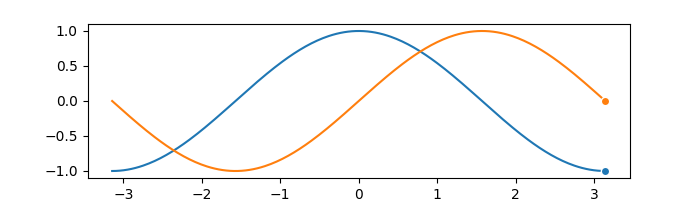

In [3]:
%matplotlib ipympl
import matplotlib.animation as animation

fig = plt.figure(figsize=(7,2), dpi=100)
ax = plt.subplot()

line1, = ax.plot(X, C, marker="o", markevery=[-1], markeredgecolor="white")
line2, = ax.plot(X, S, marker="o", markevery=[-1], markeredgecolor="white")

def update(frame):
    line1.set_data(X[:frame], C[:frame])
    line2.set_data(X[:frame], S[:frame])

ani = animation.FuncAnimation(fig, update, interval=10, frames=len(X));
plt.show();

Notice the end point marker that move with the animation. The reason is that we specify a single marker at the end ( `markevery=[-1]` ) such that each time we set new data, marker will automatically move.

Let's pretend we're satisified with our animation, now it is time to save it. Matplotlib is able to create a movie file but options are rather scarce. A better solution is to use an external library such as [FFMpeg](https://www.ffmpeg.org/) which is available on most systems. Once installed, you will be able to use the dedicated `FFMpegWriter` as shown below:

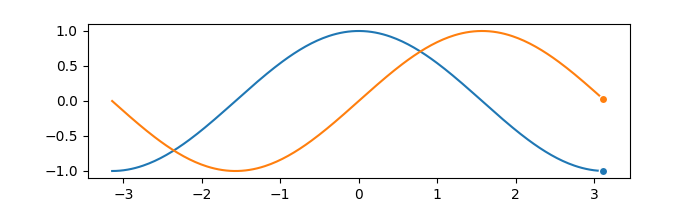

In [5]:
%matplotlib ipympl
import matplotlib.animation as animation

fig = plt.figure(figsize=(7,2), dpi=100)
ax = plt.subplot()

line1, = ax.plot(X, C, marker="o", markevery=[-1], markeredgecolor="white")
line2, = ax.plot(X, S, marker="o", markevery=[-1], markeredgecolor="white")

def update(frame):
    line1.set_data(X[:frame], C[:frame])
    line2.set_data(X[:frame], S[:frame])

writer = animation.FFMpegWriter(fps=30)
anim = animation.FuncAnimation(fig, update, interval=10, frames=len(X));
anim.save("data/sine-cosine.mp4", writer=writer, dpi=100);

plt.show();

You may have noticed that the animation did not start immediately because there is actually a delay that corresponds to the movie creation. For sine and cosine, the delay is rather short and it is not really a problem. However, for long and complex animations, this delay can become quite significant and it becomes necessary to track its progress. So let's add some information using the [tqdm](https://github.com/tqdm/tqdm) library.

/var/folders/3k/s8vv032x2hx5kgfs3dzpbqjc0000gn/T/ipykernel_8086/1088507884.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/256 [00:00<?, ?it/s]

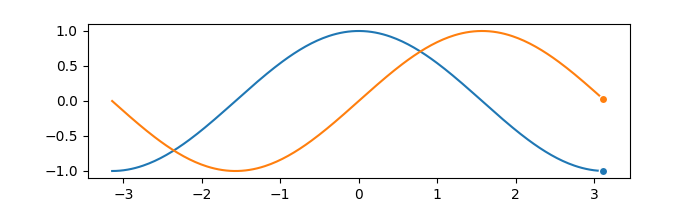

In [6]:
%matplotlib ipympl
import matplotlib.animation as animation

fig = plt.figure(figsize=(7,2), dpi=100)
ax = plt.subplot()

line1, = ax.plot(X, C, marker="o", markevery=[-1], markeredgecolor="white")
line2, = ax.plot(X, S, marker="o", markevery=[-1], markeredgecolor="white")

def update(frame):
    line1.set_data(X[:frame], C[:frame])
    line2.set_data(X[:frame], S[:frame])

writer = animation.FFMpegWriter(fps=30)
anim = animation.FuncAnimation(fig, update, interval=10, frames=len(X));

from tqdm.autonotebook import tqdm
bar = tqdm(total=len(X));
anim.save("data/sine-cosine.mp4", writer=writer, dpi=300,
          progress_callback = lambda i, n: bar.update(1))
bar.close()

plt.show();

Creation time remains the same, but at least now, we can check how slow or fast it is. Let's see the result.

<video width="100%" controls src="data/sine-cosine.mp4" type="video/mp4" />

---

# Rain animation <a name="rain"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>


A very simple rain effect can be obtained by having small growing rings randomly positioned over a figure. Of course, they won't grow forever since ripples are supposed to damp with time. To simulate this phenomenon, we can use an increasingly transparent color as the ring is growing, up to the point where it is no more visible. At this point, we remove the ring and create a new one.

First step is to create a blank figure.

In [7]:
%%capture

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white', dpi=50)

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

Then we create an empty scatter plot but we take care of settings linewidth (0.5) and facecolors ("None") that will apply to any new data.

In [8]:
# Empty scatter
scatter = ax.scatter([], [], s=[], lw=0.5, edgecolors=[], facecolors="None")

Next, we need to create several rings. For this, we can use the scatter plot object that is generally used to visualize points cloud, but we can also use it to draw rings by specifying we don't have a facecolor. We also have to take care of initial size and color for each ring such that we have all sizes between a minimum and a maximum size. In addition, we need to make sure the largest ring is almost transparent.

In [9]:
n = 50
R = np.zeros(n, dtype=[ ("position", float, (2,)),
                        ("size",     float, (1,)),
                        ("color",    float, (4,)) ])                       
R["position"] = np.random.uniform(0, 1, (n,2))
R["size"] = np.linspace(0, 1, n).reshape(n,1)
R["color"][:,3] = np.linspace(0, 1, n)

Now, we need to write the update function for our animation. We know that at each time step each ring should grow and become more transparent while the largest ring should be totally transparent and thus removed. Of course, we won't actually remove the largest ring but re-use it to set a new ring at a new random position, with nominal size and color. Hence, we keep the number of rings constant.

In [10]:
def rain_update(frame):
    global R, scatter

    # Transparency of each ring is increased
    R["color"][:,3] = np.maximum(0, R["color"][:,3] - 1/len(R))

    # Size of each rings is increased
    R["size"] += 1/len(R)

    # Reset last ring
    i = frame % len(R)
    R["position"][i] = np.random.uniform(0, 1, 2)
    R["size"][i] = 0
    R["color"][i,3] = 1
    
    # Update scatter object accordingly
    scatter.set_edgecolors(R["color"])
    scatter.set_sizes(1000*R["size"].ravel())
    scatter.set_offsets(R["position"])

Last step is to tell matplotlib to use this function as an update function for the animation and display the result (or save it as a movie). The whole script reads:

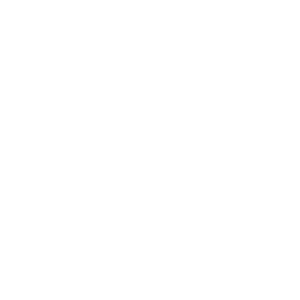

In [11]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def rain_update(frame):
    global R, scatter

    R["color"][:,3] = np.maximum(0, R["color"][:,3] - 1/len(R))
    R["size"] += 1/len(R)

    i = frame % len(R)
    R["position"][i] = np.random.uniform(0,1,2)
    R["size"][i] = 0
    R["color"][i,3] = 1
    
    scatter.set_edgecolors(R["color"])
    scatter.set_sizes(1000*R["size"].ravel())
    scatter.set_offsets(R["position"])
    
fig = plt.figure(figsize=(6,6), facecolor='white', dpi=50)
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])
scatter = ax.scatter([], [], s=[], linewidth=0.5, edgecolors=[], facecolors="None")

n = 50
R = np.zeros(n, dtype=[ ("position", float, (2,)),
                        ("size",     float, (1,)),
                        ("color",    float, (4,)) ])                       
R["position"] = np.random.uniform(0, 1, (n,2))
R["size"] = np.linspace(0, 1, n).reshape(n,1)
R["color"][:,3] = np.linspace(0, 1, n)

animation = animation.FuncAnimation(fig, rain_update, interval=10, frames=200);

---

# Earthquakes visualization   <a name="earthquakes"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

We'll now use the rain animation to visualize earthquakes on the planet from the last 30 days. The USGS Earthquake Hazards Program is part of the National Earthquake Hazards Reduction Program (NEHRP) and provides several data on their website. Those data are sorted according to earthquakes magnitude, ranging from significant only down to all earthquakes, major or minor. You would be surprised by the number of minor earthquakes happening every hour on the planet. Since this would represent too much data for us, we'll stick to earthquakes with magnitude > 4.5. At the time of writing, this already represent more than 300 earthquakes in the last 30 days.

First step is to read and convert data. We'll use the urllib library that allows us to open and read remote data. Data on the website use the CSV format whose content is given by the first line:

> time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
> 2015-08-17T13:49:17.320Z,37.8365,-122.2321667,4.82,4.01,mw,...
> 2015-08-15T07:47:06.640Z,-10.9045,163.8766,6.35,6.6,mwp,...

We are only interested in latitude, longitude and magnitude and we won't parse time of event.

In [12]:
import urllib
import numpy as np

# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Magnitude > 4.5
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Magnitude > 2.5
# url = urllib.request.urlopen(feed + "2.5_month.csv")

# Magnitude > 1.0
# url = urllib.request.urlopen(feed + "1.0_month.csv")

# Reading and storage of data
data = url.read().split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, (2,)),
                               ('magnitude', float, (1,))])

for i in range(len(data)):
    row = data[i].split(b',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])

Now, we need to draw the earth on a figure to show precisely where the earthquake center is and to translate latitude/longitude in some coordinates matplotlib can handle. Fortunately, there is the [basemap](https://matplotlib.org/basemap/) toolkit that is really simple to install and to use.

First step is to define a projection to draw the earth onto a screen (there exists many different projections) and we'll stick to the mill projection which is rather standard for non-specialist like me.

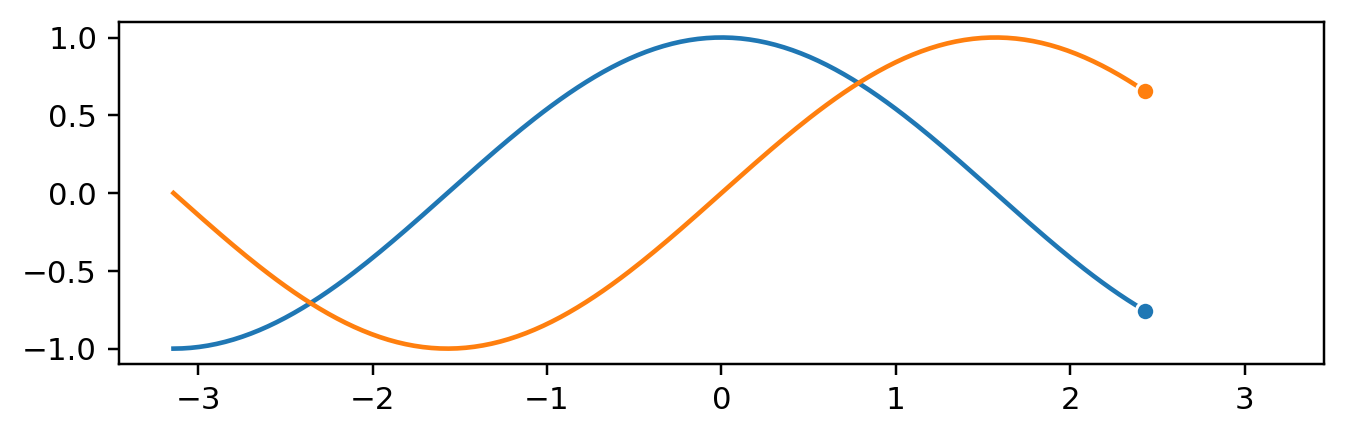

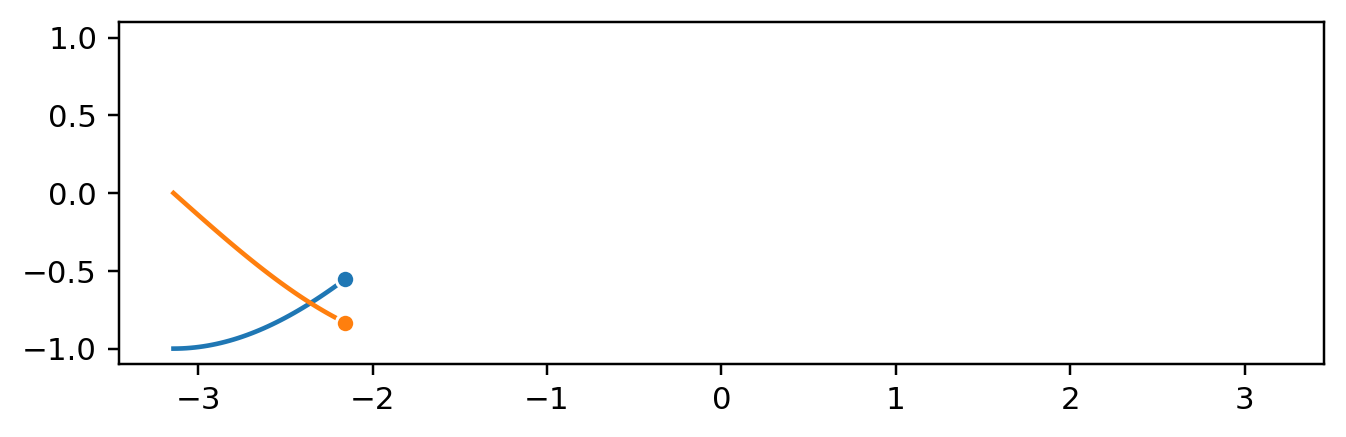

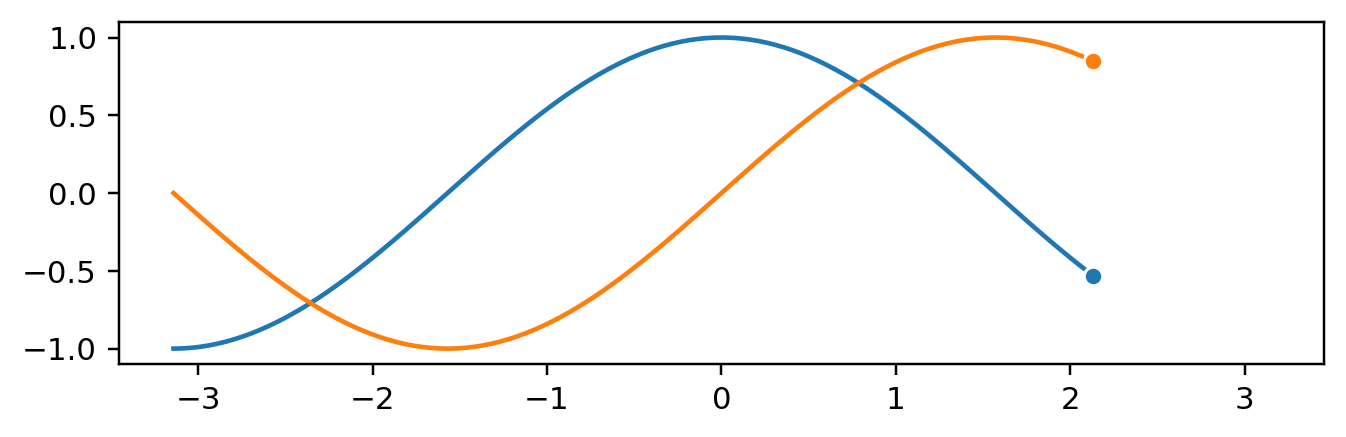

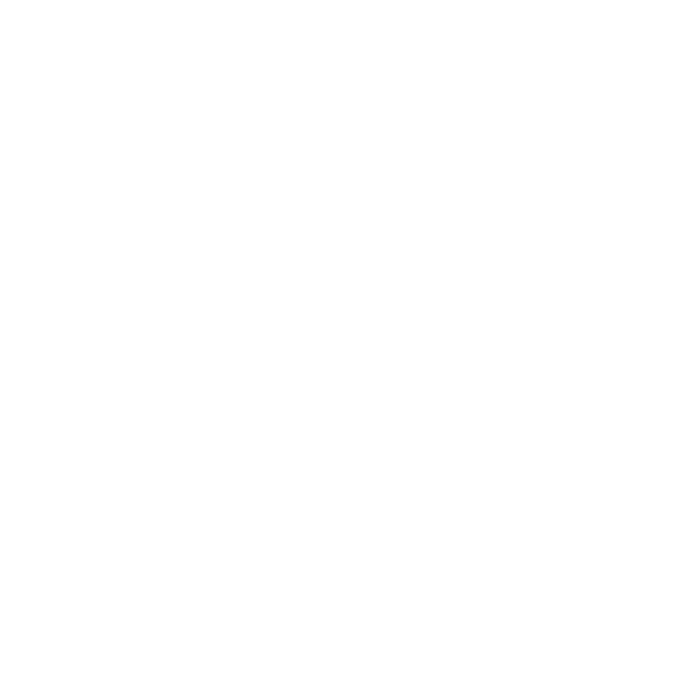

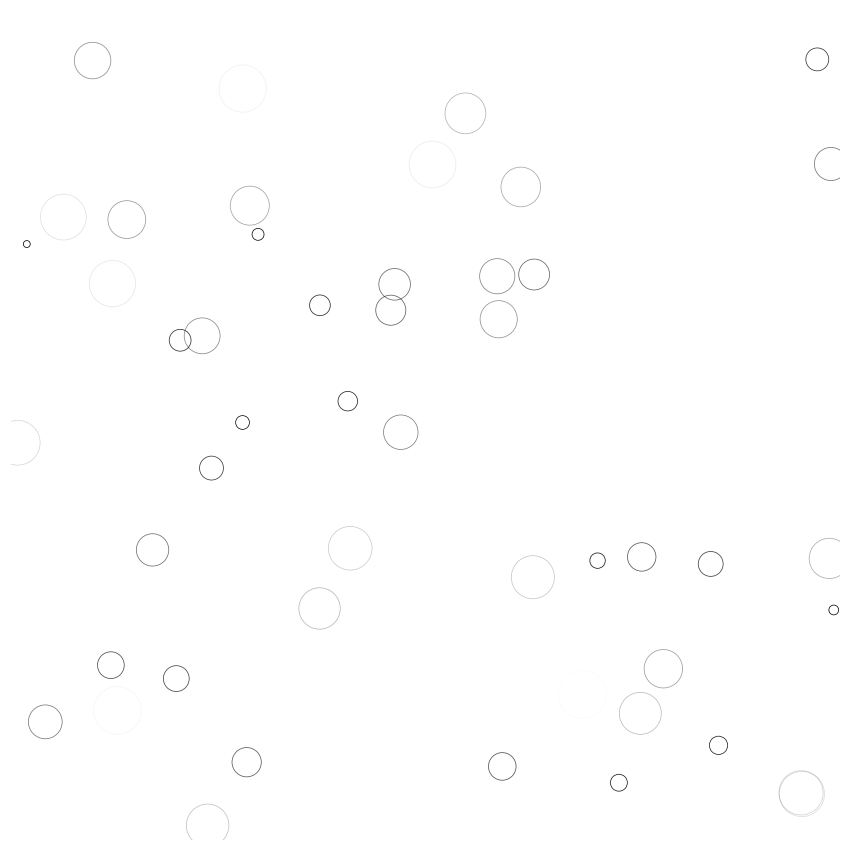

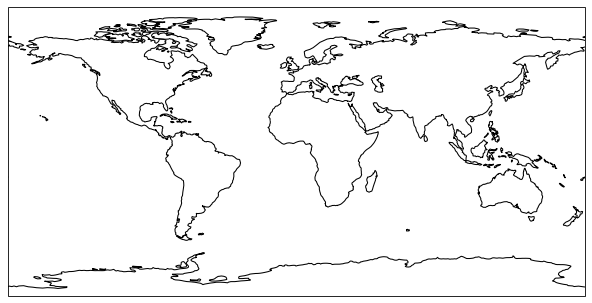

In [13]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5), dpi=75)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show();

We can now adapt our rain animation to display eartquakes. Note that we add a `transform` to the scatter plot such that coordinates will be automatically transformed.

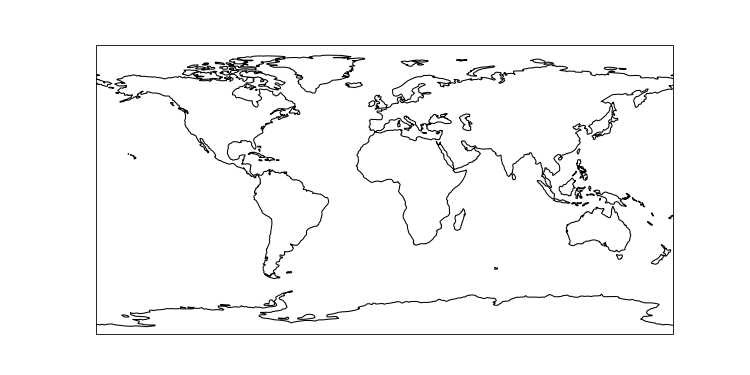

In [15]:
%matplotlib ipympl

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def rain_update(frame):
    global R, scatter
    
    current = frame % len(E)
    i = frame % len(R)

    R["color"][:,3] = np.maximum(0, R["color"][:,3] - 1/len(R))
    R["size"] += R["growth"]

    i = frame % len(R)
    R["position"][i] = E["position"][current]
    R["size"][i] = 5
    R["growth"][i] = 0.1*np.exp(E["magnitude"][current])
    R["color"][i,3] = 1
    
    scatter.set_edgecolors(R["color"])
    scatter.set_sizes(R["size"].ravel())
    scatter.set_offsets(R["position"])
    
fig = plt.figure(figsize=(10,5), dpi=75)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scatter = ax.scatter([], [], s=[],  transform=ccrs.PlateCarree(),
                     linewidth=0.5, edgecolors=[], facecolors="None")

n = 50
R = np.zeros(n, dtype=[ ("position", float, (2,)),
                        ("size",     float, (1,)),
                        ("growth",     float, (1,)),
                        ("color",    float, (4,)) ])                       
R["position"] = np.random.uniform(0, 1, (n,2))
R["size"] = np.linspace(0, 1, n).reshape(n,1)
R["color"][:,3] = np.linspace(0, 1, n)

animation = animation.FuncAnimation(fig, rain_update, interval=10, frames=200);

You can now enrich the animation with various features. For example, you could use a transparent red face color for earthquakes with magnitude greater than 7 or 8. You could also take into account the time of earthquake to set data at a precise, time, etc.

---

# Exercises <a name="exercises"></a>  <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>


## Lissajous curves

The goal of this exercise is to reproduce the animation below that show some [Lissajous curves](https://en.wikipedia.org/wiki/Lissajous_curve). Do not forget to add the leading dot for each of them.

<img src="data/lissajous.gif" width="100%"/>

----

**Copyright (c) 2021 Nicolas P. Rougier**  
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
<br/>
Code is licensed under a [2-Clauses BSD license](https://opensource.org/licenses/BSD-2-Clause)